Since today is Fed day, i thought id take a look at how rate decisions have affected Vix. Vix data starts from early 90’s so we’ll have start from there

In [1]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from pandas.tseries.offsets import *

sns.set(style="whitegrid")
%matplotlib inline

In [2]:
fed = pd.read_csv("Data/fed_dates.csv", index_col="Date")
fed.index = pd.to_datetime(fed.index, format="%m/%d/%Y")
fed["Rate"] = fed["Rate"].apply(lambda x: x[:-1])

vix = quandl.get("YAHOO/INDEX_VIX", authtoken="YOUR KEY")
vix["pct"] = np.log(vix["Close"]).diff()

Setting up the rate decision dates

In [3]:
fed_raised = fed[fed["Rate"] > fed["Rate"].shift(1)]
fed_lowered = fed[fed["Rate"] < fed["Rate"].shift(1)]
fed_unch = fed[fed["Rate"] == fed["Rate"].shift(1)]

Eyeballing all rate decisions since early 90’s along with Vix

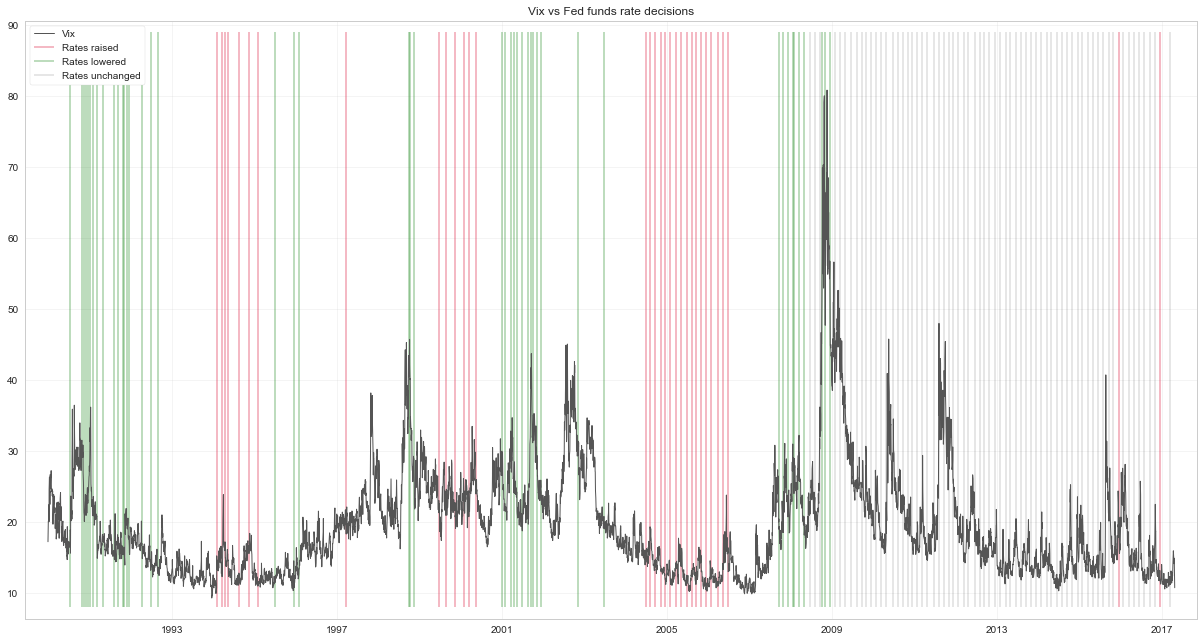

In [4]:
sdate = vix.index[1] # When vix data starts

fig = plt.figure(figsize=(21, 11))

plt.plot(vix["Close"], linewidth=1, color="#555555", label="Vix")
plt.vlines(fed_raised.loc[sdate:].index, 8, 89, color="crimson", alpha=0.34, label="Rates raised")
plt.vlines(fed_lowered.loc[sdate:].index, 8, 89, color="forestgreen", alpha=0.34, label="Rates lowered")
plt.vlines(fed_unch.loc[sdate:].index, 8, 89, color="k", alpha=0.11, label="Rates unchanged")

plt.grid(alpha=0.21)
plt.title("Vix vs Fed funds rate decisions")
plt.margins(0.02)
plt.legend(loc="upper left", facecolor="w", framealpha=1, frameon=True)

The sample size is small, nevertheless lets look at how Vix has behaved in rate increases, decreases and when rates have unchanged

In [5]:
def get_rets(dates):
    days_before = 10+1
    days_after = 64+1
    out_instances = pd.DataFrame()
    
    for index, row in dates.iterrows():
        start_date = index - BDay(days_before)
        end_date = index + BDay(days_after)
        
        out = vix["pct"].loc[start_date: end_date]
        out.reset_index(inplace=True, drop=True)
        out = out.fillna(0)
        out_instances[index] = out
    
    out_instances.ix[-1] = 0 # Starting from 0 pct
    out_instances.sort_index(inplace=True)
    out_instances.reset_index(inplace=True)
    out_instances.drop("index", axis=1, inplace=True)
    return out_instances

inst_raised = get_rets(fed_raised.loc[sdate:])
inst_lowered = get_rets(fed_lowered.loc[sdate:])
inst_unch = get_rets(fed_unch.loc[sdate:])

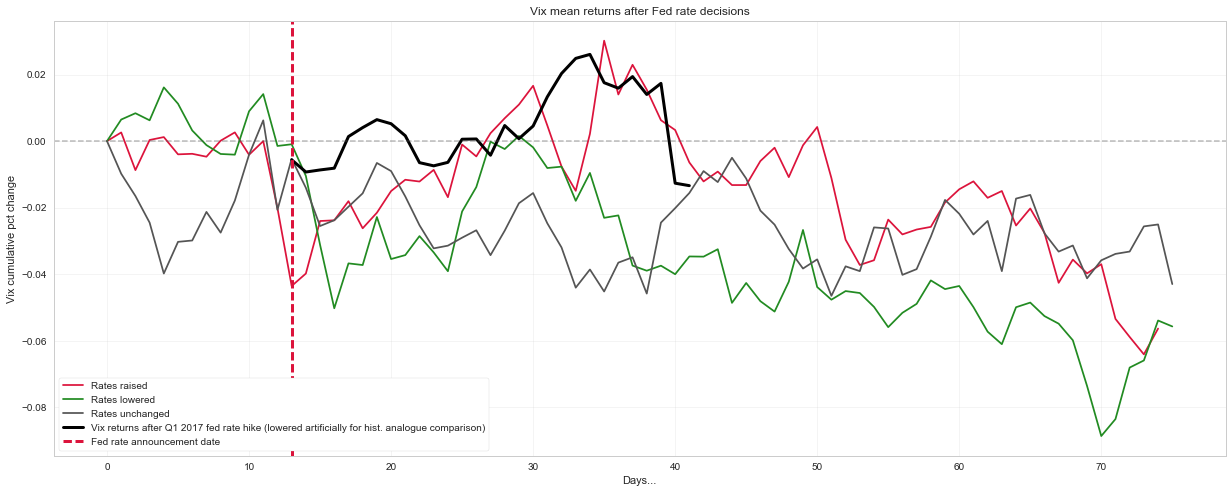

In [6]:
#recent_fed = vix["pct"].loc[pd.Timestamp("2017-03-15", freq="D")-11:pd.Timestamp("2017-03-15", freq="D")+65].cumsum()
recent_fed = vix.loc[pd.Timestamp("2017-03-15", freq="D"):pd.Timestamp("2017-03-15", freq="D")+65]
recent_fed = recent_fed.reset_index()
recent_fed.index = recent_fed.index+13

fig = plt.figure(figsize=(21, 8))

plt.plot(inst_raised.mean(axis=1).cumsum(), color="crimson", label="Rates raised")
plt.plot(inst_lowered.mean(axis=1).cumsum(), color="forestgreen", label="Rates lowered")
plt.plot(inst_unch.mean(axis=1).cumsum(), color="#555555", label="Rates unchanged")
plt.plot(recent_fed["pct"].cumsum()/10, color="k", linewidth=3,
         label="Vix returns after Q1 2017 fed rate hike (lowered artificially for hist. analogue comparison)")

plt.axvline(13, color="crimson", linewidth=3, linestyle="--", alpha=1, label="Fed rate announcement date")
plt.axhline(0, color="#555555", linestyle="--", alpha=0.34, label="_no_label_")
plt.title("Vix mean returns after Fed rate decisions")
plt.ylabel("Vix cumulative pct change")
plt.xlabel("Days...")
plt.grid(alpha=0.21)
plt.legend(loc="lower left", facecolor="w", framealpha=1, frameon=True)

Thanks your time and feel free to leave a comment